<a href="https://colab.research.google.com/github/Hafsa-Ugase/Hate-Speech-detection-/blob/main/Combined_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# <font color='#2F4F4F'>**Hate Speech Detectoin on Twitter.**</font>   

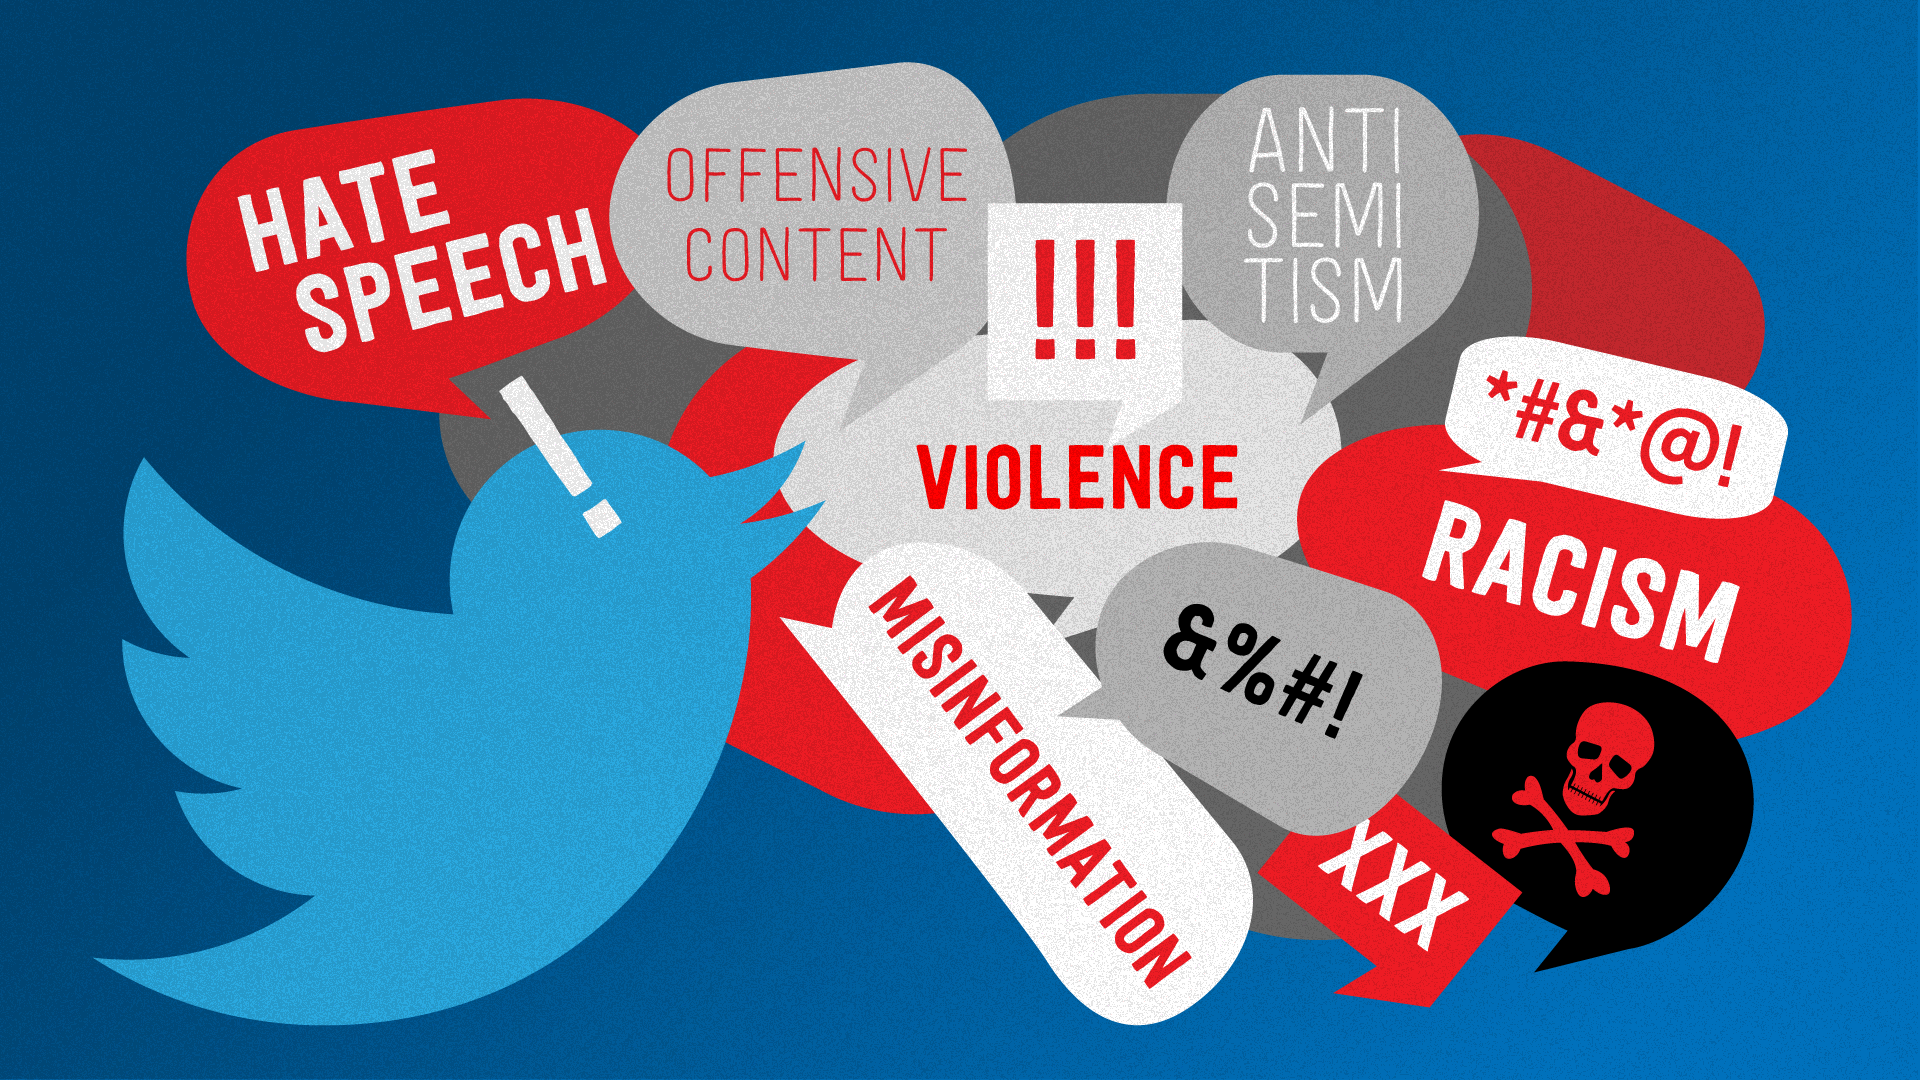


---

# <font color='#2F4F4F'>Summary of this page study</font>                 

→ Hate speech has become one of the main problems that exists on Twitter's plattform. In this project using supervised machine learning along with classification models, that will be able to detect hate content on Twitter's dataset.

- Overview

Logestic regression is the final algothim model, as it perfomed well in both diffrent feature extraction TFI-DF and counter vectrozier. combined dataset with HASOC2019 were imbalanced. I applied technquies to balance the data, the best one was Tomek links also. It seems the model perfomed better in a large dataset.
---

---


# <font color='#2F4F4F'>Dataset Source </font>  

---

The dataset will be used in this projet:

HASOC 2019 dataset contains 5852 texts of tweets. HASOC stands for Hate Speech and Pffensive Content identification in Indo-European Language, and its laballed. The dataset is classified into Hate and Offensive language (HOF), Non Hate Offensive (NOT), and the Hate and Offensive are classified to 4 catagories:
HATE
OFFENSIVE
PROFANE
NEITHER
The raw dataset can be found here: → "https://raw.githubusercontent.com/datascisteven/Automated-Hate-Tweet-Detection/main/data/original/english_dataset.tsv"

The dataset contains hate speech content on column task_2 will be added to the davidosn dataset as class 1, and offensive and language combined together in class 0

The total of hate speech words combined is: 2573.

---


# <font color='#8B008B'>**Import libraries** </font>

---

In [259]:

# importing libraries
!pip install tweet-preprocessor
import pandas as pd # imports the dataset csv.
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import nltk
import string
import re 
import preprocessor as pr
import seaborn as sns


nltk.download('stopwords')
from nltk.corpus import stopwords
# one way to show the data in a string values
#",".join(stopwords.words('english'))
# another way to print out the data values
stop_wordsall= (stopwords.words('english'))
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
ps = nltk.PorterStemmer()


# importing models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# importing 

from sklearn.model_selection import train_test_split,cross_validate , GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer ,TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics 



from imblearn.under_sampling import TomekLinks

from collections import Counter

tom = TomekLinks()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---


# <font color='#8B008B'>**Data Loading** </font>

---

In [260]:
df1 = pd.read_csv("https://raw.githubusercontent.com/datascisteven/Automated-Hate-Tweet-Detection/main/data/original/english_dataset.tsv" ,sep='\t')

---


# <font color='#8B008B'>**Checking for missing values** </font>

---

In [261]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text_id  5852 non-null   object
 1   text     5852 non-null   object
 2   task_1   5852 non-null   object
 3   task_2   5852 non-null   object
 4   task_3   5852 non-null   object
dtypes: object(5)
memory usage: 228.7+ KB


<Axes: >

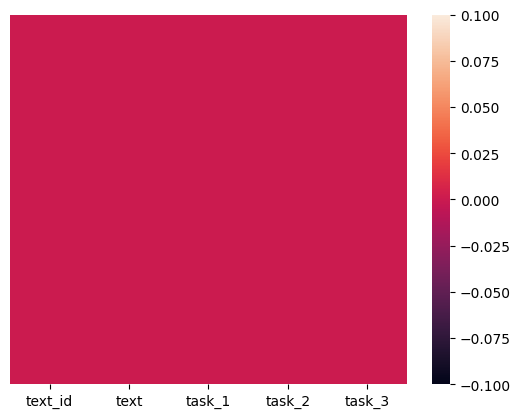

In [262]:
sns.heatmap(df1.isnull(), yticklabels = False)


---


# <font color='#8B008B'>**Data visulazition** </font>

---





Text(0.5, 1.0, 'NONE , HATE, PRFN , OFFN ')

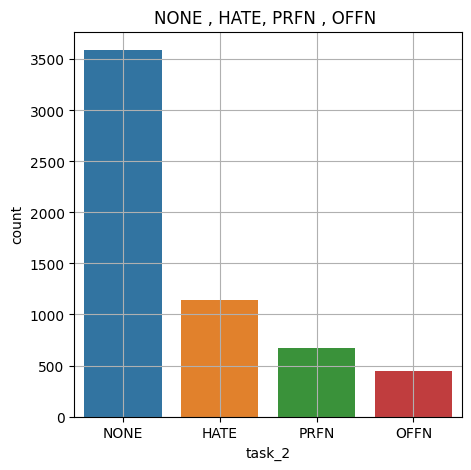

In [263]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='task_2', data = df1)
plt.grid()

plt.title('NONE , HATE, PRFN , OFFN ')


---


# <font color='#8B008B'>**Count of column task_value** </font>

---

In [264]:
df1.task_2.value_counts()

NONE    3591
HATE    1143
PRFN     667
OFFN     451
Name: task_2, dtype: int64

---


# <font color='#8B008B'>**Data preprocessing** </font>

---

In [265]:
def remove_users(df,col):

    df[col] = df[col].apply(lambda x: re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(x)))
    df[col] = df[col].apply(lambda x: re.sub("@[A-Za-z0-9_]+","",str(x)))


def remove_links(df,col):

    df[col] = df[col].apply(lambda x: re.sub(r'http\S+', '', str(x)))
    df[col] = df[col].apply(lambda x: re.sub(r'www\S+', '', str(x)))

def remove_pun(df,col):

    df[col] = df[col].apply(lambda x: re.sub(r"[^a-zA-Z]", " ", str(x)))
    df[col] = df[col].apply(lambda x: x.lower())


#  tokenzie 
tokenized_tweet = df1['text'].apply(lambda x: x.split())

# stop word 
tokenized_tweet=  tokenized_tweet.apply(lambda x: [word for word in x if word not in stop_wordsall]) 

# stem
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x]) 

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df1['text'] = tokenized_tweet

def preprocess_tweets(df, col):

    remove_users(df, col)
    remove_links(df, col)
    remove_pun(df, col)
  
    return df

---


# <font color='#8B008B'>**Combine datasets** </font>

---

I combined hate speech column from HASOC2019 dataset with Davidson dataset, and offensive and neither are in one column. From a different perpsective, I wanted to see if the results are going to change if the dataset is bigger, and if it will detect hate speech words.

For this expirment, I will use the final model from the previous dataset to compare the results.

---

In [267]:
comb_1 = df1[df1['task_2'] == 'HATE']
comb_1['target'] = 1
preprocess_tweets(comb_1, 'text')
comb_1 = comb_1[['text', 'target']]

<ipython-input-267-0ac27e174bcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_1['target'] = 1
<ipython-input-265-14d8e40d9796>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(x)))
<ipython-input-265-14d8e40d9796>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [268]:
comb_2 = pd.read_csv("https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv", index_col=0)
comb_2 = comb_2.drop(columns=['count', 'hate_speech', 'offensive_language', 'neither'], axis=1)
comb_2.columns = ['target', 'text']
comb_2 = comb_2.replace({'target': {1: 0, 2: 0, 0: 1}})
preprocess_tweets(comb_2, 'text')
comb_2 = comb_2[['target', 'text']]


In [269]:
df_combined = pd.concat([ comb_1, comb_2], ignore_index=True)
df_combined

,text,target
0,no we rememb clearli individual admit trea...,1
1,i don t know much i take compuls liar tr...,1
2,shameonicc icc dhoni glove vs icc plan ...,1
3,disgusting and don t chang cultur come vet sy...,1
4,of retir nfl players don t suffer cte you b...,1
...,...,...
25921,you s a muthaf in lie right his ...,0
25922,you ve gone and broke the wrong heart baby an...,0
25923,young buck wanna eat dat nigguh like i ain...,0
25924,youu got wild bitches tellin you lies,0


---


# <font color='#8B008B'>**Lengh of combined dataset** </font>

---

In [270]:
len (df_combined)

25926


---


# <font color='#8B008B'>**Distrubtion of combined dataset** </font>

---



<Axes: xlabel='target', ylabel='count'>

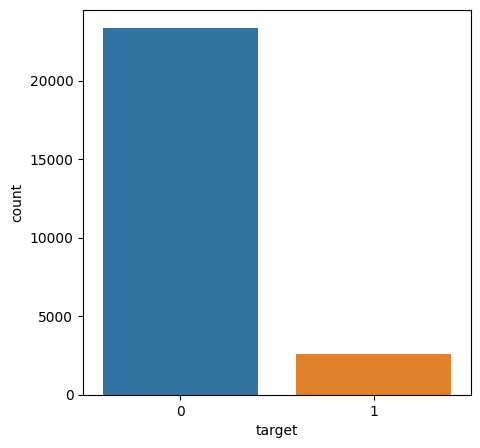

In [271]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='target', data = df_combined)

---


# <font color='#8B008B'>**What is the most common words in Combined dataset?** </font>  

---

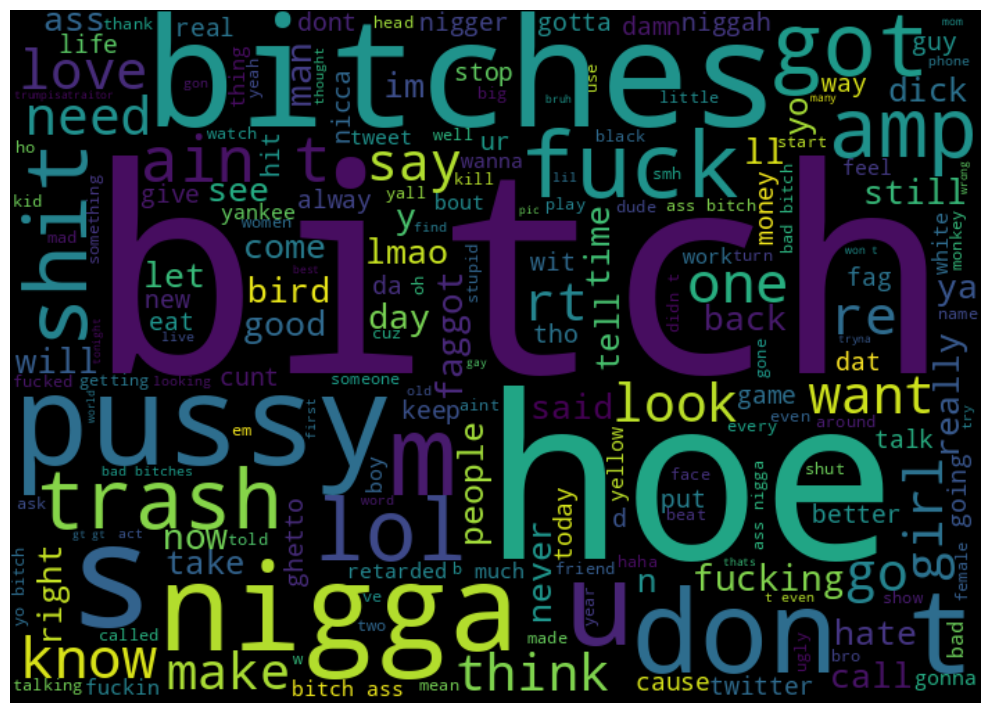

In [272]:
#import worldcloud
from wordcloud import WordCloud
commonwords = ' '.join([text for text in df_combined['text']])

wordcloud = WordCloud(height = 500, width = 700, background_color = 'black', random_state= 25,).generate(commonwords)
plt.figure(figsize=(20, 9))

#shows the dataset in a displayed image
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

---


# <font color='#8B008B'>**What is the most common hate words in Combined dataset?** </font>  

---

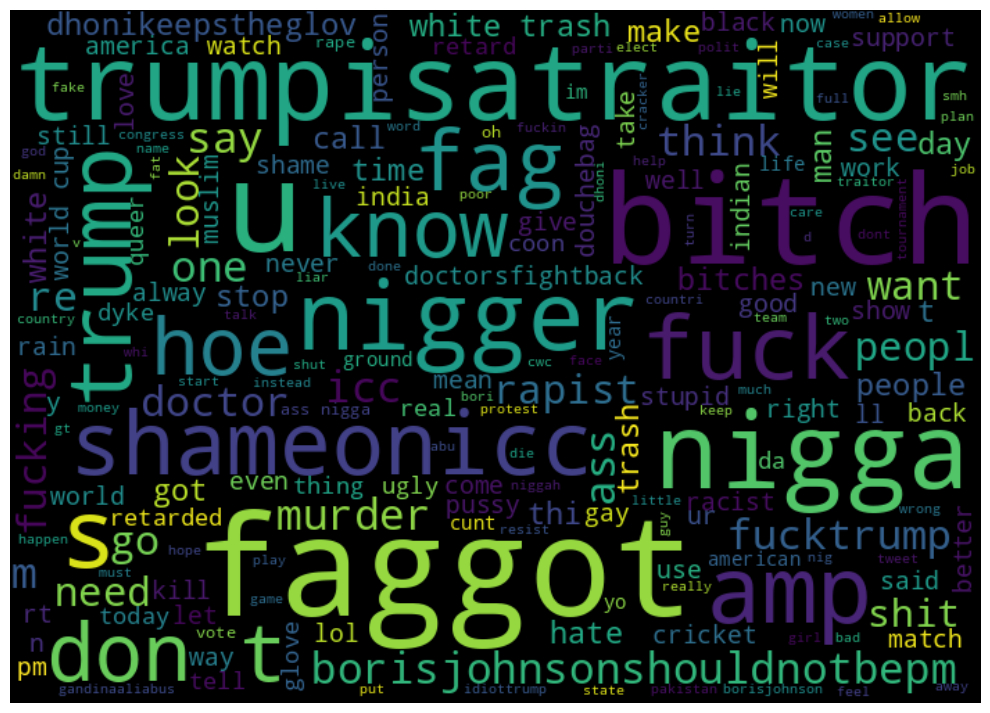

In [273]:
hatewords = ' '.join([text for text in df_combined['text'][df_combined["target"] == 1]])

wordcloud = WordCloud(height = 500, width = 700, background_color = 'black',random_state= 25,max_font_size=100).generate(hatewords)
plt.figure(figsize=(20, 9))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()


---


# <font color='#8B008B'>**Count of combined dataset** </font>

---

**0 for Offensive language, and Neither**
**1 for hate speech**

In [274]:
df_combined.target.value_counts()

0    23353
1     2573
Name: target, dtype: int64

---


# <font color='#8B008B'>**Checking for missing values** </font>

---

In [275]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25926 entries, 0 to 25925
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25926 non-null  object
 1   target  25926 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 405.2+ KB


In [276]:
df_x =df_combined ['text']
df_y =df_combined['target'].astype(int)

---


# <font color='#8B008B'>**Data imbalanced** </font>

---

<Axes: ylabel='target'>

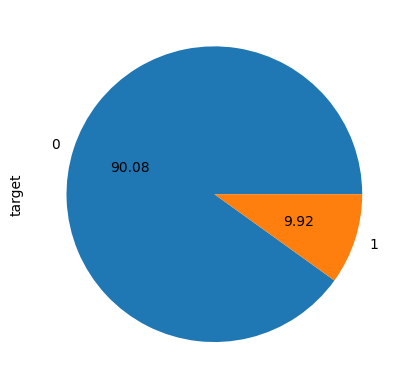

In [277]:
df_y.value_counts().plot.pie(autopct='%.2f')

---


# <font color='#8B008B'>**Logestic regression with Counter victrozier** </font>

---

In [278]:
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42, test_size=0.2)

In [279]:
# Count vectorzier with stop words
count_vectorizer = CountVectorizer()
count = CountVectorizer(stop_words=stop_wordsall)

#Fit the count words to trainning 
X_train_count = count.fit_transform(X_train)

#Fit the count words to testing
X_test_count = count.transform(X_test)

In [280]:
#Logestic regression 
count_log_reg= LogisticRegression(max_iter=100,class_weight='balanced', penalty='l2', solver='saga')

# fitting the model 
count_log_reg.fit(X_train_count, y_train)

# Predict class labels
y_pred_lg = count_log_reg.predict(X_test_count)

# Evaluation of the model 
print(classification_report(y_test, y_pred_lg))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4681
           1       0.54      0.74      0.63       505

    accuracy                           0.91      5186
   macro avg       0.76      0.84      0.79      5186
weighted avg       0.93      0.91      0.92      5186



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [281]:
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             count_log_reg.predict(X_train_count))*100)

Training Accuracy :  95.2410800385728


---


# <font color='#8B008B'>**Confusion metrix Logestic regression**</font>
---

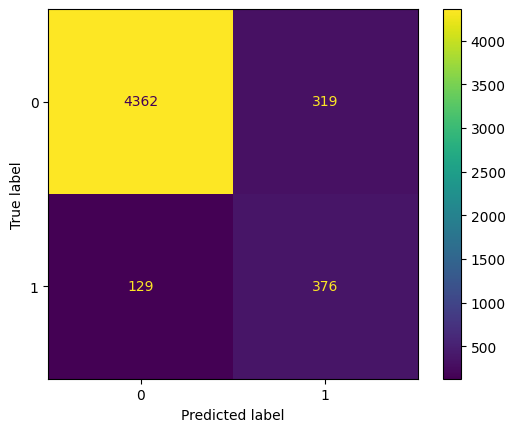

In [282]:
#Confusion matrix

cm = confusion_matrix(y_test,y_pred_lg,labels=count_log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=count_log_reg.classes_)

disp.plot()
plt.show()

---


# <font color='#8B008B'>**Random Forest with Counter victrozier** </font>

---

In [283]:
# RandomForest with hyperpramters
rf=RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=42)

# fitting the model 
rf.fit(X_train_count,y_train)

# Predict class labels
y_pred_rf = rf.predict(X_test_count)

# Evaluation of the model 
print(classification_report(y_test,y_pred_rf ))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4681
           1       0.70      0.59      0.64       505

    accuracy                           0.94      5186
   macro avg       0.83      0.78      0.80      5186
weighted avg       0.93      0.94      0.93      5186



In [284]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train, rf.predict(X_train_count ))*100)

Training Accuracy is :  99.74927675988428


---


# <font color='#8B008B'>**Confusion matrix Random Forest**</font>
---

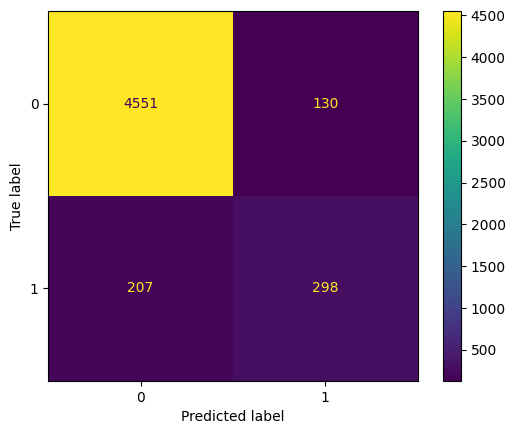

In [285]:
#Confusion matrix

cm = confusion_matrix(y_test,y_pred_rf,labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()
plt.show()

---


# <font color='#8B008B'>**Ada Boost with Counter victrozier** </font>

---

In [286]:
# Setting decision tree
dt = DecisionTreeClassifier(max_depth=1)

# AdaBoost
ada = AdaBoostClassifier(random_state=42)

# fitting the model 
ada.fit(X_train_count,y_train)

# Predict class labels
y_pred_ada_comb = ada.predict(X_test_count)

# Evaluation of the model
print(classification_report(y_test, y_pred_ada_comb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4681
           1       0.89      0.47      0.61       505

    accuracy                           0.94      5186
   macro avg       0.92      0.73      0.79      5186
weighted avg       0.94      0.94      0.93      5186



In [287]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train,ada.predict(X_train_count))*100)

Training Accuracy is :  94.39729990356798


---


# <font color='#8B008B'>**Confusion matrix Ada Boost**</font>
---

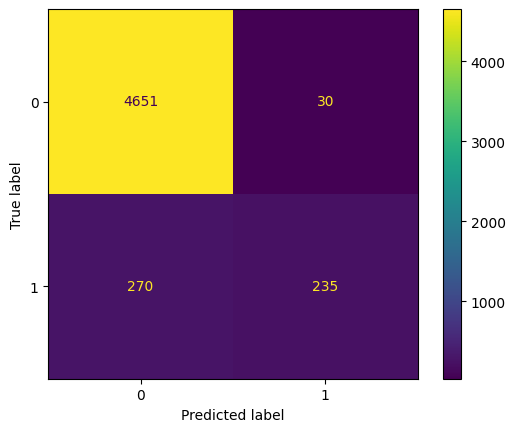

In [288]:
#Confusion matrix

cm = confusion_matrix(y_test,y_pred_ada_comb,labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada.classes_)

disp.plot()
plt.show()

---


# <font color='#8B008B'>**KNN with Counter victrozier** </font>

---

In [289]:
# KNN 
kn_comb = KNeighborsClassifier()

# fitting the model 
kn_comb.fit(X_train_count,y_train)

# Predict class labels
y_pred_kn_comb = kn_comb.predict(X_test_count)

# Evaluation of the model
print(classification_report(y_test, y_pred_kn_comb))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4681
           1       0.54      0.19      0.29       505

    accuracy                           0.91      5186
   macro avg       0.73      0.59      0.62      5186
weighted avg       0.88      0.91      0.88      5186



In [290]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train,kn_comb.predict(X_train_count ))*100)

Training Accuracy is :  92.08775313404051


---


# <font color='#8B008B'>**Confusion matrix KNN**</font>
---

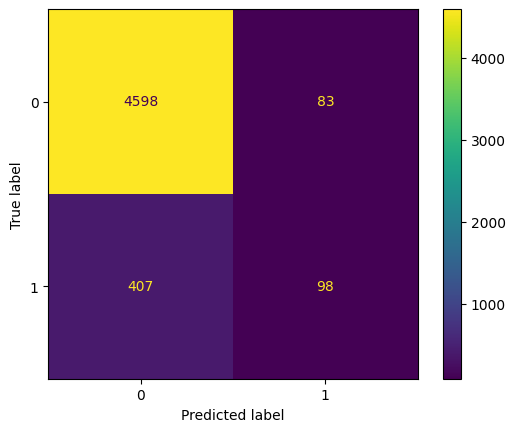

In [291]:
#Confusion matrix

cm = confusion_matrix(y_test,y_pred_kn_comb,labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada.classes_)

disp.plot()
plt.show()

---


# <font color='#FF4500'>**Conclusion** </font>

---

In [292]:
import io 
from google.colab import files
uploaded = files.upload()

Saving Counter vectorizer-Combined dataset.xlsx to Counter vectorizer-Combined dataset (1).xlsx


In [293]:
df= pd.read_excel(io.BytesIO(uploaded['Counter vectorizer-Combined dataset.xlsx']))
df

,Model name,Precision,recall,f1-score
0,Logestic Regression - Counter v,0.54,0.74,0.63
1,Ada Boost - Counter v,0.89,0.47,0.61
2,Random Forest- Counter v,0.70,0.59,0.64
3,KNN - Counter v,0.54,0.19,0.29


---


# <font color='#8B0000'>**Using balanced technique on Count logestic regression** </font>

---

---


# <font color='#8B0000'>**Count Logestic regression using Tomek links** </font>

---

In [294]:
#import Tomek links 
from imblearn.under_sampling import TomekLinks
tom = TomekLinks()

In [295]:
#Appply Tomek links on the trainning data
tomek_X_train, tomek_y_train = tom.fit_resample(X_train_count, y_train)

In [296]:
#Logestic regrresion
tomek_log = LogisticRegression(max_iter=100,class_weight='balanced',C=0.1, penalty='l2',solver='saga',random_state = 42)

In [297]:
#Fit the model
tomek_log.fit(tomek_X_train, tomek_y_train)

#Predict class labels
tomek_log_preds = tomek_log.predict(X_test_count)

# Evaluation of the model
print(classification_report(y_test, tomek_log_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      4681
           1       0.52      0.78      0.63       505

    accuracy                           0.91      5186
   macro avg       0.75      0.85      0.79      5186
weighted avg       0.93      0.91      0.92      5186



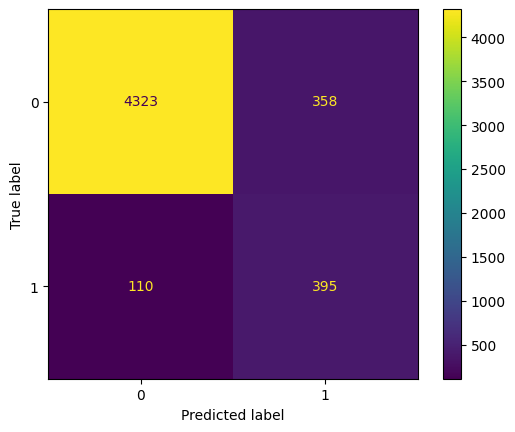

In [298]:
#Confusion matrix

cm = confusion_matrix(y_test, tomek_log_preds, labels=tomek_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tomek_log.classes_)

disp.plot()
plt.show()


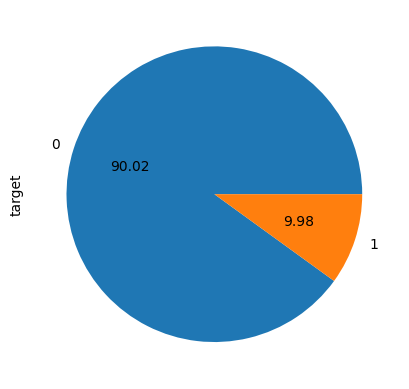

In [299]:
#Data distribution after Tomek links
ax = tomek_y_train.value_counts().plot.pie(autopct='%.2f')

---


# <font color='#8B0000'>**Count Logestic regression using SMOTE** </font>

---

In [300]:
# import SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)

In [301]:
#Appply SMOTE on the trainning data
smote_X_train, smote_y_train = smote.fit_resample(X_train_count, y_train)

In [302]:
# Logestic regression
lg_smote = LogisticRegression( max_iter=100,class_weight='balanced',C=0.1, penalty='l2',solver='saga')

In [303]:
#Fit the model
lg_smote.fit(smote_X_train,smote_y_train)

#Predict class labels
y_predict = lg_smote.predict(X_test_count)

# Evaluation of the model
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      4681
           1       0.44      0.70      0.54       505

    accuracy                           0.88      5186
   macro avg       0.70      0.80      0.74      5186
weighted avg       0.91      0.88      0.90      5186



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


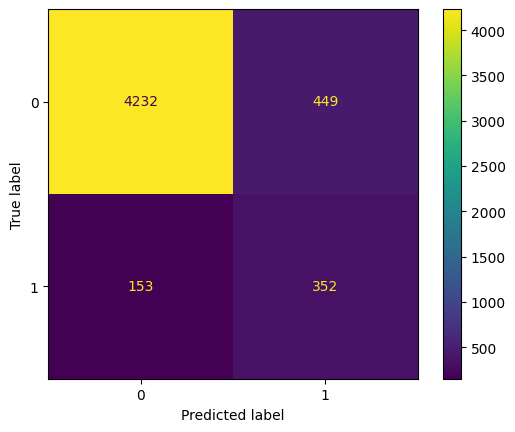

In [304]:
#Confusion matrix

cm = confusion_matrix(y_test, y_predict, labels=lg_smote.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lg_smote.classes_)

disp.plot()
plt.show()


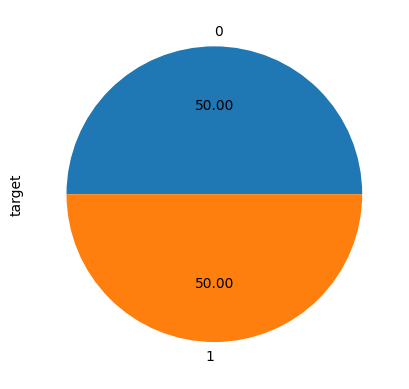

In [305]:
# Data distribution after SMOTE
ax = smote_y_train.value_counts().plot.pie(autopct='%.2f')

---


# <font color='#8B0000'>**Count Logestic regression using RandomUnderSampler** </font>

---

In [306]:
# import RadnomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

In [307]:
#Appply RandomUnerSampler on the trainning data
ros = RandomUnderSampler(random_state= 42)

# fit the model after ressample
X_res, y_res = ros.fit_resample (X_train_count, y_train)

In [308]:
# Logestic regression
clf = LogisticRegression(max_iter=100,class_weight='balanced', penalty='l2',solver='saga').fit(X_res, y_res)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [309]:
#Predict class labels
y_pred_o = clf.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test, y_pred_o))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      4681
           1       0.40      0.82      0.53       505

    accuracy                           0.86      5186
   macro avg       0.69      0.84      0.73      5186
weighted avg       0.92      0.86      0.88      5186



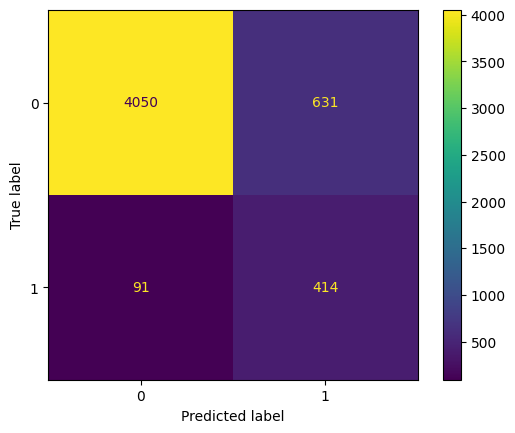

In [310]:
#Confusion matrix


cm = confusion_matrix(y_test,y_pred_o ,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()
plt.show()

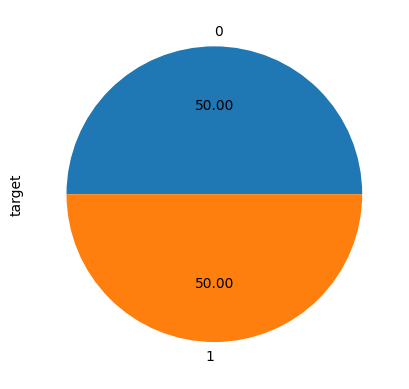

In [311]:
#Data distribution after RandomUnerSampler
ax = y_res.value_counts().plot.pie(autopct='%.2f')

---


# <font color='#FF4500'>**Conclusion** </font>

---

Tomek links performed the best.

---


# <font color='#DAA520'>**Futher experiment with data spliting in Combined dataset** </font>

---

**70% training & 30% testing**

---


In [312]:
#Data split to 70% training & 30% testing
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42, test_size=0.3)

In [313]:
# Count vectorzier with stop words
count_vectorizer = CountVectorizer()
count = CountVectorizer(stop_words=stop_wordsall)

#Fit the count words to trainning 
X_train_count = count.fit_transform(X_train)

#Fit the count words to testing
X_test_count = count.transform(X_test)

In [314]:
#Appply Tomek links on the trainning data
tomek_X_train, tomek_y_train = tom.fit_resample(X_train_count, y_train)


In [315]:
#Logestic regression with Tomek links
tomek_log = LogisticRegression(max_iter=100,class_weight='balanced',C=0.1, penalty='l2',solver='saga',random_state = 42)

In [316]:
#Fit the model
tomek_log.fit(tomek_X_train, tomek_y_train)

#Predict class labels
tomek_log_preds = tomek_log.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test, tomek_log_preds ))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7018
           1       0.51      0.79      0.62       760

    accuracy                           0.91      7778
   macro avg       0.74      0.85      0.78      7778
weighted avg       0.93      0.91      0.91      7778



**60% training & 40% testing**

---

In [317]:
#Data split to 60% training & 40% testing
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42, test_size=0.4)

In [318]:
#Count vectorzier with stop words
count_vectorizer = CountVectorizer()
count = CountVectorizer(stop_words=stop_wordsall)

#Fit the count words to trainning 
X_train_count = count.fit_transform(X_train)

#Fit the count words to testing
X_test_count = count.transform(X_test)

In [319]:
#Appply Tomek links on the trainning data
tomek_X_train, tomek_y_train = tom.fit_resample(X_train_count, y_train)

In [320]:
#Logestic regression with Tomek links
tomek_log = LogisticRegression(max_iter=100,class_weight='balanced',C=0.1, penalty='l2',solver='saga',random_state = 42)

In [321]:
#Fit the model
tomek_log.fit(tomek_X_train, tomek_y_train)

#Predict class labels
tomek_log_preds = tomek_log.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test, tomek_log_preds))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      9358
           1       0.52      0.77      0.62      1013

    accuracy                           0.91     10371
   macro avg       0.75      0.85      0.79     10371
weighted avg       0.93      0.91      0.92     10371



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


---


# <font color='#8B008B'>**Further experiment using TFIDF** </font>

---

---


# <font color='#8B008B'>**Logestic Regression** </font>

---

In [322]:
#TFIDF 
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix 
# confront text to numeric 
tfidf = tfidf_vectorizer.fit_transform(df_combined['text'] )

In [323]:
X =tfidf

y =df_combined['target'].astype(int)

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [324]:
# Logestic regression 
lg_comb = LogisticRegression(max_iter=100,class_weight='balanced', penalty='l2', solver='saga')

# fitting the model 
lg_comb.fit(X_train_tfidf,y_train)

# Predict class labels
y_pred_comb = lg_comb.predict(X_test_tfidf)

# Evaluation of the model 
print(classification_report(y_test, y_pred_comb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4681
           1       0.68      0.66      0.67       505

    accuracy                           0.94      5186
   macro avg       0.82      0.81      0.82      5186
weighted avg       0.94      0.94      0.94      5186



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [325]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train, lg_comb.predict(X_train_tfidf ))*100)

Training Accuracy is :  96.00771456123432


---


# <font color='#8B008B'>**Random Forest** </font>

---

In [326]:
# RandomForest
rf_comb=RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=42)

# fitting the model 
rf_comb.fit(X_train_tfidf,y_train)

# Predict class labels
y_pred_rf_comb = rf_comb.predict(X_test_tfidf)

# Evaluation of the model
print(classification_report(y_test, y_pred_rf_comb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4681
           1       0.82      0.49      0.61       505

    accuracy                           0.94      5186
   macro avg       0.89      0.74      0.79      5186
weighted avg       0.93      0.94      0.93      5186



In [327]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train,rf_comb.predict(X_train_tfidf ))*100)

Training Accuracy is :  99.74445515911282


---


# <font color='#8B008B'>**Ada Bosst** </font>

---

In [328]:
# Setting decision tree
dt = DecisionTreeClassifier(max_depth=1)

# AdaBoost
ada_comb = AdaBoostClassifier(random_state=42)

# fitting the model 
ada_comb.fit(X_train_tfidf,y_train)

# Predict class labels
pred_ada_comb = ada_comb.predict(X_test_tfidf)

# Evaluation of the model
print(classification_report(y_test, pred_ada_comb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4681
           1       0.88      0.45      0.60       505

    accuracy                           0.94      5186
   macro avg       0.91      0.72      0.78      5186
weighted avg       0.94      0.94      0.93      5186



In [329]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train,ada_comb.predict(X_train_tfidf))*100)

Training Accuracy is :  94.34908389585343


---


# <font color='#8B008B'>**KNN** </font>

---

In [330]:
# KNN 
kn_comb = KNeighborsClassifier()

# fitting the model 
kn_comb.fit(X_train_tfidf,y_train)

# Predict class labels
y_pred_kn_comb = kn_comb.predict(X_test_tfidf)

# Evaluation of the model
print(classification_report(y_test, y_pred_kn_comb))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4681
           1       0.61      0.08      0.14       505

    accuracy                           0.91      5186
   macro avg       0.76      0.54      0.55      5186
weighted avg       0.88      0.91      0.87      5186



In [331]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train,kn_comb.predict(X_train_tfidf ))*100)

Training Accuracy is :  91.1330761812922


---


# <font color='#FF4500'>**Conclusion** </font>

---

In [340]:
import io 
from google.colab import files
uploaded = files.upload()

Saving TFIDF Combined dataset.xlsx to TFIDF Combined dataset (2).xlsx


In [341]:
df= pd.read_excel(io.BytesIO(uploaded['TFIDF Combined dataset.xlsx']))
df

,Model name,Precision,recall,f1-score
0,Logestic Regression - TFIDF,0.68,0.66,0.67
1,Ada Boost - TFIDF,0.88,0.45,0.60
2,Random Forest- TFIDF,0.82,0.49,0.61
3,KNN - TFIDF,0.61,0.08,0.14


---
# <font color='8B008B'>**Tomek links /Logestic regression using TFIDF vectorizer** </font>

---

In [334]:
#import Tomek links 
from imblearn.under_sampling import TomekLinks
tom = TomekLinks()

In [335]:
#Appply Tomek links on the trainning data
tomek_X_train, tomek_y_train = tom.fit_resample(X_train_tfidf, y_train)

In [336]:
#Logestic regresssoin
tomek_log_lg = LogisticRegression(max_iter=100,class_weight='balanced',C=0.1, penalty='l2',solver='saga',random_state = 42)

In [337]:
#Fit the model
tomek_log_lg.fit(tomek_X_train, tomek_y_train)

#Predict class labels
tomek_log_preds_lg = tomek_log_lg.predict(X_test_tfidf)

# Evaluation of the model
print(classification_report(y_test, tomek_log_preds_lg))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4681
           1       0.55      0.73      0.62       505

    accuracy                           0.91      5186
   macro avg       0.76      0.83      0.79      5186
weighted avg       0.93      0.91      0.92      5186



---


# <font color='#FF4500'>**Conclusion** </font>

---

**Final model for combined dataset is Logestic Regrression with counter vec using Tomek links**

---

In [342]:
import io 
from google.colab import files
uploaded = files.upload()

Saving Final_result_Combined.xlsx to Final_result_Combined (1).xlsx


In [343]:
df= pd.read_excel(io.BytesIO(uploaded['Final_result_Combined.xlsx']))
df

,Model name,Precision,recall,f1-score
0,Logestic Regression - Counter v/Tomek links,0.54,0.74,0.63


**References:**

1. https://github.com/datascisteven/Automated-Hate-Tweet-Detection
2. https://www.geeksforgeeks.org/generating-word-cloud-python/ 
3. https://github.com/NakulLakhotia/Hate-Speech-Detection-in-Social-Media-using-Python/blob/master/final_customization.ipynb 

4. https://www.youtube.com/watch?v=RjhFcNZa1qo
5. https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/final_notebook.ipynb
6. https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html
7. https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/

8. https://www.youtube.com/watch?v=Bt5g7c2s38M&t=732s
9. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html